# Module 2 - Word Encoding

#### Importing Modules

In [1]:
from data import TwitterP
import numpy as np
from tqdm import trange

In [2]:
#load_data returns training, validation and test data after splitting all the dataframes
trainT, validationT, testT = TwitterP.load_data()

In [3]:
print(f"{len(trainT)} training samples")
print(f"{len(validationT)} validation samples")
print(f"{len(testT)} testing samples")

520 training samples
173 validation samples
1638 testing samples


In [4]:
#total number of positive training data points
(trainT["Positive"] == 1).sum()

304

In [5]:
#total number of negative training data points
(trainT["Negative"] == 1).sum() 

216

In [6]:
df=trainT.append(validationT)
df=df.append(testT)
len(df)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15980\3917059376.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=trainT.append(validationT)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15980\3917059376.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(testT)


2331

In [7]:
df.Positive.value_counts() 
df.head()
df.tail()

,id,name,username,bio,location,url,join_date,join_time,tweets,following,followers,likes,media,private,verified,profile_image_url,background_image,Negative,Positive
1455,2.965550e+08,Ash🤓,Jahlisaa,"I bake, I craft, & some other cool stuff // as...",NaN,NaN,11-05-2011,00:17:02 UTC,43275,319,249,28059,965,False,False,https://pbs.twimg.com/profile_images/163757712...,https://pbs.twimg.com/profile_banners/29655503...,1,0
2243,9.930000e+17,¹³cin | FACE PJM Set Me Free,miniestmint,#JIMIM: You all deserve to be always loved. 𝑭𝒂...,She: 21+ jichae| 🐥🐈,NaN,06-05-2018,07:54:02 UTC,114907,779,561,44146,11185,False,False,https://pbs.twimg.com/profile_images/163665672...,https://pbs.twimg.com/profile_banners/99303614...,1,0
1186,1.440000e+18,DJ Dark Rabbit,DJDarkRabbit,Online DJ (Newbie) // Game Streamer,Wonderland,https://t.co/9NA75fMqP1,25-09-2021,19:26:55 UTC,143,664,680,1197,51,False,False,https://pbs.twimg.com/profile_images/153200471...,https://pbs.twimg.com/profile_banners/14418465...,0,1
1979,1.570000e+18,Castr,BinshiCastr,"Hai, just nothing in here.\nMy hobby is overth...",NaN,NaN,18-09-2022,10:15:41 UTC,26,27,0,523,1,False,False,https://pbs.twimg.com/profile_images/163306972...,https://pbs.twimg.com/profile_banners/15714426...,1,0
1619,3.006523e+09,aww yea its dat boi!,TrillinDaGame,he is a soul who uses Renoise. check out https...,"mars, alabama",https://t.co/usnbIDVy8g,30-01-2015,21:50:34 UTC,49963,4991,875,126260,4305,False,False,https://pbs.twimg.com/profile_images/105424130...,https://pbs.twimg.com/profile_banners/30065233...,1,0


In [8]:
Negative_tweets=[]
Positive_tweets=[]
n_private=0

In [9]:
#representing panda dataframes in the form of arrays for cleaning tweets

for i in trange(1,len(df)):
    timeline, retval = TwitterP.get_username_profile(df['username'].iloc[i])
    if(retval == 0):
        continue
    if df["Positive"][i]==1:
        if (timeline.empty):
            n_private+=1
        else:
            Positive_tweets=np.append(Positive_tweets,timeline.tweet)
    if df["Negative"][i]==1:
        if (timeline.empty):
            n_private+=1
        else:
            Negative_tweets=np.append(Negative_tweets,timeline.tweet)

100%|█████████████████████████████████████████████████████████████████████████████| 2330/2330 [00:16<00:00, 142.30it/s]


In [10]:
PL = [1] * len(Positive_tweets) 
NL = [0] * len(Negative_tweets) 
len(Positive_tweets), len(Negative_tweets)

(25718, 18079)

In [11]:
x=np.append(Positive_tweets,Negative_tweets)
y=np.append(PL,NL)
x=np.append(Positive_tweets[0:15000],Negative_tweets[0:2000])
y=np.append(PL[0:15000],NL[0:2000])

### Cleaning Tweets

In [12]:
import preprocessor as p

In [13]:
def preprocess_tweet(text):
    text = p.clean(text)
    return text

### Cleaning positive tweets

In [14]:
# Executes basic preprocessing through built-in preprocess function

print(Positive_tweets)
for i in range (len(Positive_tweets)):
    Positive_tweets[i] = preprocess_tweet(Positive_tweets[i])    

['It’s 1am and I’m thinking about Chicago deep dish pizza'
 '@samanthawilli2  https://t.co/h6d8Pv5iEQ'
 'Still manically thinking of flying to Disney next weekend 🙃' ...
 'Why It’s Worth Off-Ramping From Spiritual Bypassing: March 10th, 2023 By\xa0Lissa Rankin, MD Guest writer for\xa0Wake Up World Spiritual bypassing, a phrase coined by John Welwood and defined as a kind of spiritualized conflict avoidance that demonizes certain…  https://t.co/DAlm7V5wNN  https://t.co/ZurhScSszC'
 '3 Wonder Herbs for Autoimmune Disease: March 9th, 2023 By\xa0Nick Polizzi Guest writer for Wake Up World Twenty years ago, the term “autoimmune disease” was virtually unspoken of. It certainly wasn’t something you would see in the big news headlines – like…  https://t.co/Gw1vIMngpb  https://t.co/P01KyXdzKb'
 '8 Ways to Use Activated Charcoal: March 9th, 2023 By Ty Bollinger Guest Writers for Wake Up World As strange as it may sound, the practice of using the charred remains of non-toxic wood and other vegeta

In [15]:
Positive_tweets

array(['Its am and Im thinking about Chicago deep dish pizza', '',
       'Still manically thinking of flying to Disney next weekend', ...,
       'Why Its Worth Off-Ramping From Spiritual Bypassing: March th, ByLissa Rankin, MD Guest writer forWake Up World Spiritual bypassing, a phrase coined by John Welwood and defined as a kind of spiritualized conflict avoidance that demonizes certain',
       'Wonder Herbs for Autoimmune Disease: March th, ByNick Polizzi Guest writer for Wake Up World Twenty years ago, the term autoimmune disease was virtually unspoken of. It certainly wasnt something you would see in the big news headlines like',
       'Ways to Use Activated Charcoal: March th, By Ty Bollinger Guest Writers for Wake Up World As strange as it may sound, the practice of using the charred remains of non-toxic wood and other vegetation for both utilitarian and health-related'],
      dtype=object)

In [16]:
from gensim.parsing.preprocessing import remove_stopwords

In [17]:
def stopword_removal(text):
    text = remove_stopwords(text)
    return text

In [18]:
# removes stopwords in the tweets by importing all known english stopwords through gensim module

for i in range (len(Positive_tweets)):
    Positive_tweets[i] = stopword_removal(Positive_tweets[i])

In [19]:
Positive_tweets

array(['Its Im thinking Chicago deep dish pizza', '',
       'Still manically thinking flying Disney weekend', ...,
       'Why Its Worth Off-Ramping From Spiritual Bypassing: March th, ByLissa Rankin, MD Guest writer forWake Up World Spiritual bypassing, phrase coined John Welwood defined kind spiritualized conflict avoidance demonizes certain',
       'Wonder Herbs Autoimmune Disease: March th, ByNick Polizzi Guest writer Wake Up World Twenty years ago, term autoimmune disease virtually unspoken of. It certainly wasnt big news headlines like',
       'Ways Use Activated Charcoal: March th, By Ty Bollinger Guest Writers Wake Up World As strange sound, practice charred remains non-toxic wood vegetation utilitarian health-related'],
      dtype=object)

In [20]:
#converting all words to lowercase for easier processing

for i in range (len(Positive_tweets)):
    Positive_tweets[i] = Positive_tweets[i].lower().replace('[^\w\s]',' ').replace('\s\s+', ' ')

In [21]:
Positive_tweets

array(['its im thinking chicago deep dish pizza', '',
       'still manically thinking flying disney weekend', ...,
       'why its worth off-ramping from spiritual bypassing: march th, bylissa rankin, md guest writer forwake up world spiritual bypassing, phrase coined john welwood defined kind spiritualized conflict avoidance demonizes certain',
       'wonder herbs autoimmune disease: march th, bynick polizzi guest writer wake up world twenty years ago, term autoimmune disease virtually unspoken of. it certainly wasnt big news headlines like',
       'ways use activated charcoal: march th, by ty bollinger guest writers wake up world as strange sound, practice charred remains non-toxic wood vegetation utilitarian health-related'],
      dtype=object)

In [22]:
#importing modules for generating a wordcloud

from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#converting 2D array to list

list_words = []
for string in Positive_tweets:
    list_words.append(string.split())
    
list_words

[['its', 'im', 'thinking', 'chicago', 'deep', 'dish', 'pizza'],
 [],
 ['still', 'manically', 'thinking', 'flying', 'disney', 'weekend'],
 ['were', 'entering', 'best', 'season,', 'aries', 'season', 'bbs'],
 ['never', 'thought', 'id', 'this,', 'i', 'hate', 'leaving', 'texas'],
 ['!!!'],
 ['yeah',
  'martin',
  'johnson',
  'boys',
  'like',
  'girls',
  'having',
  'baby',
  'cool',
  'like',
  'affects',
  'getting',
  'us',
  'tour',
  'going',
  'zoey',
  'moment'],
 ['me', 'trying', 'figure', 'math', 'mathing', 'minute'],
 ['i', 'love', 'hole', 'wall.', 'its', 'super', 'easy', 'parking', 'right'],
 ['have', 'best', 'day', 'miss', 'come', 'damn', 'east', 'coast'],
 ['i', 'die,'],
 ['happy', 'birth-d,', 'd!'],
 ['i', 'looking', 'respectfully', 'cut', 'ok'],
 ['for', 'you,'],
 [],
 ['buc-ees-', 'need'],
 ['all', 'men', 'lie'],
 ['it', 'actually', 'disencouraged', 'follow'],
 ['when', 'i', 'karaoke', 'crowd', 'work', 'quality.'],
 [],
 ['cardigan', 'taylor', 'swift', 'karaoke', 'song', '

In [24]:
#converting 2D list to single list

newlist = []

for item in list_words:
    for i in item:
        newlist.append(i)
newlist

['its',
 'im',
 'thinking',
 'chicago',
 'deep',
 'dish',
 'pizza',
 'still',
 'manically',
 'thinking',
 'flying',
 'disney',
 'weekend',
 'were',
 'entering',
 'best',
 'season,',
 'aries',
 'season',
 'bbs',
 'never',
 'thought',
 'id',
 'this,',
 'i',
 'hate',
 'leaving',
 'texas',
 '!!!',
 'yeah',
 'martin',
 'johnson',
 'boys',
 'like',
 'girls',
 'having',
 'baby',
 'cool',
 'like',
 'affects',
 'getting',
 'us',
 'tour',
 'going',
 'zoey',
 'moment',
 'me',
 'trying',
 'figure',
 'math',
 'mathing',
 'minute',
 'i',
 'love',
 'hole',
 'wall.',
 'its',
 'super',
 'easy',
 'parking',
 'right',
 'have',
 'best',
 'day',
 'miss',
 'come',
 'damn',
 'east',
 'coast',
 'i',
 'die,',
 'happy',
 'birth-d,',
 'd!',
 'i',
 'looking',
 'respectfully',
 'cut',
 'ok',
 'for',
 'you,',
 'buc-ees-',
 'need',
 'all',
 'men',
 'lie',
 'it',
 'actually',
 'disencouraged',
 'follow',
 'when',
 'i',
 'karaoke',
 'crowd',
 'work',
 'quality.',
 'cardigan',
 'taylor',
 'swift',
 'karaoke',
 'song',


In [25]:
#counting the occurrences of the 250 most commonly used words in positive tweets

from collections import Counter

L = Counter(tuple(newlist))
print(L.most_common()[0:250])

[('i', 5028), ('like', 1311), ('the', 1202), ('.', 1029), ('&amp;', 773), ('im', 761), ('you', 758), ("i'm", 730), ('-', 717), ('good', 716), ("it's", 691), ('know', 689), ('love', 687), ('people', 684), ('que', 646), (',', 616), ('time', 553), ('this', 499), ("don't", 498), ('dont', 476), ('think', 472), ('la', 471), ('a', 451), ('need', 434), ('it', 426), ('my', 410), ('want', 405), ('day', 404), ('and', 398), ('if', 395), ('y', 395), ('got', 393), ('new', 388), ('en', 364), ('feel', 349), ('going', 334), ('na', 332), ('happy', 330), ('so', 329), ('we', 329), ('way', 323), ('what', 322), ('life', 322), ('!', 320), ('u', 312), ('el', 310), ('best', 295), ('thank', 294), ('to', 272), ('it.', 268), ('work', 266), ('its', 265), ('just', 264), ('look', 263), ('no', 258), ('in', 253), ('but', 244), ('things', 244), ('better', 243), ('right', 240), ('he', 240), ('great', 239), ('feeling', 234), ('hope', 228), ('sa', 227), ('e', 223), ('thats', 219), ('let', 218), ('use', 217), ('lol', 214),

## Visualizing data

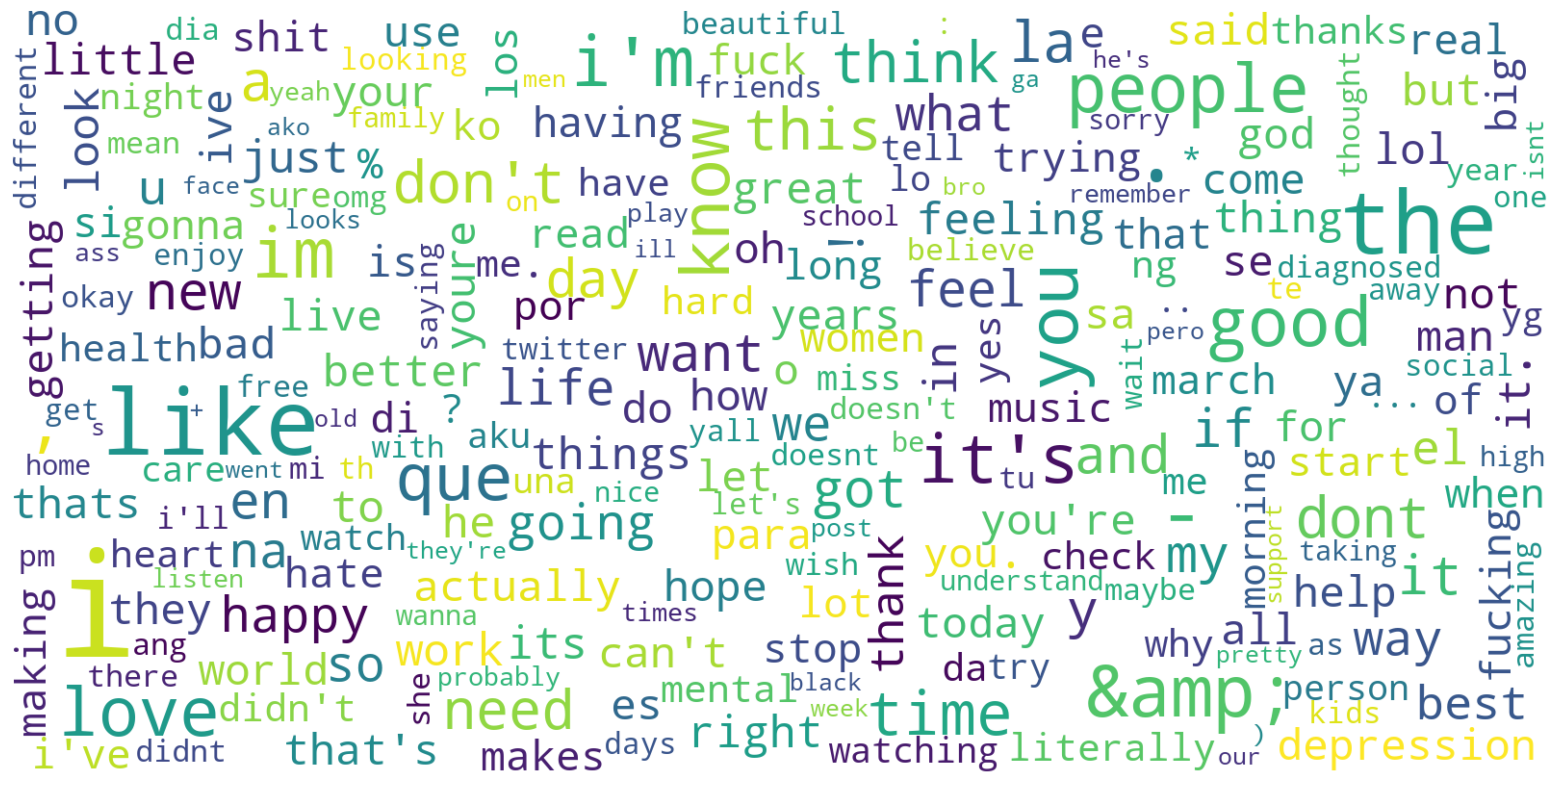

In [26]:
#generating a wordcloud of the 250 most commonly used words in positive tweets

wordcloud = WordCloud(width=1600, height=800,max_font_size=150, max_words=250, background_color="white").generate_from_frequencies(L)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("word_Positive.png")

### Cleaning Negative Tweets

In [27]:
# Executes basic preprocessing through built-in preprocess function

print(Negative_tweets)
for i in range (len(Negative_tweets)):
    Negative_tweets[i] = preprocess_tweet(Negative_tweets[i])

["@Anne_Abbot003 @radiogreenman @traxxfmofficial You're welcome 🙋🏻\u200d♂️🦋🎵🎶"
 "@radiogreenman @traxxfmofficial Thank you. I'm glad it made you smile more. Hope that it does for all who read it 🎶🎵🦜🌈😃  https://t.co/qjbwnPVn50"
 'Happy afternoon folks &amp; #GoodVibes @radiogreenman @traxxfmofficial #traxxfm #traxxfmtwittergang 🙋🏻\u200d♂️🤗💖 Have a great day #staywell #stayblessed 🎼🎶🎵🎸🥁🎹📻🎙️🎧🌻🦜🌈🇲🇾  https://t.co/gmxJKM606M'
 ... 'KANGEN YUKIIII' 'DEMI APA YUKI MAIN??'
 '@indomyfess People sm so far away']


In [28]:
# removes stopwords in the tweets by importing all known english stopwords through gensim module

for i in range (len(Negative_tweets)):
    Negative_tweets[i] = stopword_removal(Negative_tweets[i])

In [29]:
#converting all words to lowercase for easier processing

for i in range (len(Negative_tweets)):
    Negative_tweets[i] = Negative_tweets[i].lower().replace('[^\w\s]',' ').replace('\s\s+', ' ')

In [30]:
Negative_tweets

array(["you're welcome", "thank you. i'm glad smile more. hope read",
       'happy afternoon folks &amp; have great day', ...,
       'kangen yukiiii', 'demi apa yuki main??', 'people sm far away'],
      dtype=object)

In [31]:
#converting 2D array to list

list_words1 = []
for string in Negative_tweets:
    list_words1.append(string.split())

In [32]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [33]:
#converting 2D list to single list

newlist1 = []

for item in list_words1:
    for i in item:
        newlist1.append(i)
        
#checking spelling to make sure the word is English
"""
updated_list = []        
for item in newlist1:
    if item == spell.correction(item):
        updated_list.append(item)
"""

'\nupdated_list = []        \nfor item in newlist1:\n    if item == spell.correction(item):\n        updated_list.append(item)\n'

In [34]:
#counting the occurrences of the 250 most commonly used words in negative tweets

L1 = Counter(tuple(newlist1))
print(L1.most_common()[0:250])

[('i', 3982), ('.', 1126), ('like', 1070), ('the', 711), ('people', 602), ('im', 602), ('-', 591), ('good', 572), ("it's", 534), (',', 507), ('love', 499), ('&amp;', 498), ('la', 485), ("i'm", 481), ('know', 439), ('que', 435), ("don't", 397), ('you', 397), ('time', 390), ('day', 355), ('this', 346), ('!', 344), ('want', 328), ('think', 325), ('new', 317), ('we', 305), ('need', 304), ('happy', 298), ('and', 298), ('a', 293), ('going', 290), ('my', 287), ('dont', 283), ('el', 282), ('en', 282), ('got', 280), ('it', 278), ('na', 267), ('so', 255), ('thank', 253), ('y', 233), ("you're", 230), ('way', 223), ('if', 223), ('feel', 220), ('u', 217), ('sa', 214), ('lol', 211), ('right', 208), ('no', 207), ('hope', 200), ('life', 199), ('para', 199), ("can't", 194), ('come', 193), ('today', 191), ('but', 187), ("that's", 186), ('things', 180), ('best', 179), ('e', 179), ('what', 177), ('thanks', 172), ('great', 167), ('it.', 166), ('live', 166), ('they', 166), ('o', 166), ('just', 164), ('tweet

## Visualizing data

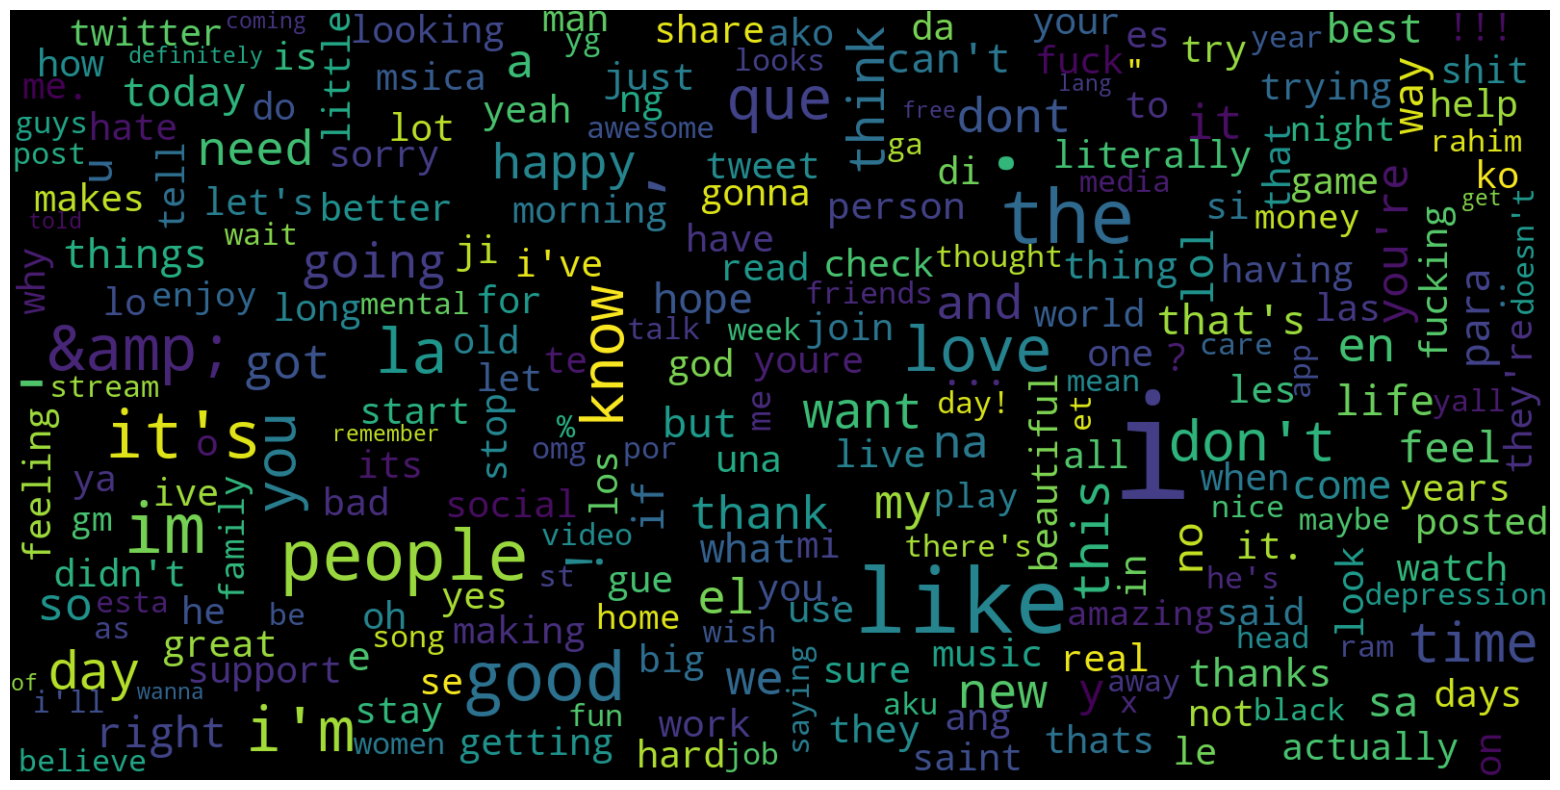

In [35]:
#generating a wordcloud of the 250 most commonly used words in negative tweets

wordcloud = WordCloud(width=1600, height=800,max_font_size=150, max_words=250, background_color="black").generate_from_frequencies(L1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("word_Negative.png")

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
MAX_NUM_WORDS = 70000

In [37]:
# preparing data for being inputted into models by converting them into vector sequences

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(Positive_tweets)
sequences = tokenizer.texts_to_sequences(Positive_tweets)
word_index = tokenizer.word_index

print("{} distinct words in original Positive text".format(len(word_index)))

35685 distinct words in original Positive text


56

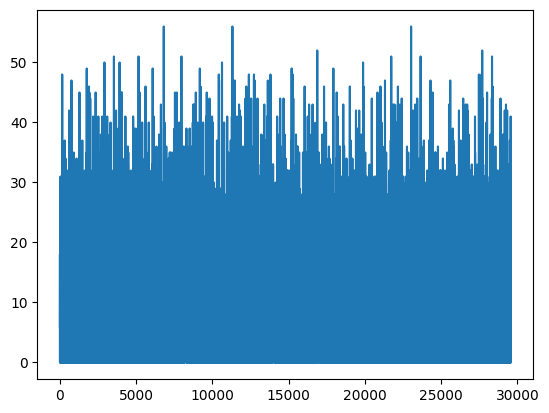

In [92]:
#visualizing the vector sequences

import matplotlib.pyplot as plt
%matplotlib inline
seq_lengths = [len(x) for x in sequences]
plt.plot(seq_lengths)
max(seq_lengths)

In [39]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(Negative_tweets)
sequences = tokenizer.texts_to_sequences(Negative_tweets)
word_index = tokenizer.word_index

print("{} distinct words in original Negative text".format(len(word_index)))

26928 distinct words in original Negative text


56

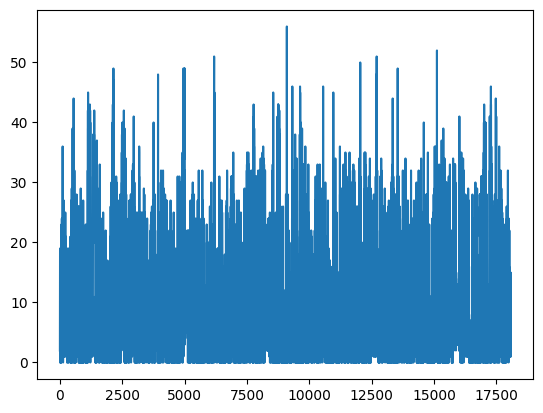

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
seq_lengths = [len(x) for x in sequences]
plt.plot(seq_lengths)
max(seq_lengths)

In [42]:
from sklearn.model_selection import train_test_split
# preprocessed data 
x=np.append(Positive_tweets,Negative_tweets)
y=np.append(PL,NL)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2020,shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2020,shuffle=True)


# Module 3 - Tweet Prediction Model (Preparing train and test sets)

In [43]:
len(x_train),len(x_test), len(x_val)

(29562, 10950, 3285)

In [56]:
len(y_train),len(y_test), len(y_val)

(29562, 10950, 3285)

In [44]:
len(y_train[y_train==1]),len(y_train[y_train==0])

(17410, 12152)

In [45]:
len(y_test[y_test==1]),len(y_test[y_test==0])

(6423, 4527)

In [46]:
len(y_val[y_val==1]),len(y_val[y_val==0])

(1885, 1400)